In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from numpy.random import multivariate_normal 
from sklearn.metrics import accuracy_score

from machine_learning.trees.isolation_forest import IsolationForest

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (12, 8)

In [3]:
mean_normal = np.array([0, 0])
cov_normal = np.array([[1, 0], [0, 1]])

mean_anomalous = np.array([3, 3])
cov_anomalous = np.array([[1, 0], [0, 1]])

train_size = 1000
test_size = 100

X_train_normal = multivariate_normal(mean_normal, cov_normal, train_size)
Y_train_normal = np.ones(train_size)

X_test_normal = multivariate_normal(mean_normal, cov_normal, test_size)
Y_test_normal = np.ones(test_size)

X_test_anomalous = multivariate_normal(mean_anomalous, cov_anomalous, test_size)
Y_test_anomalous = np.zeros(test_size)

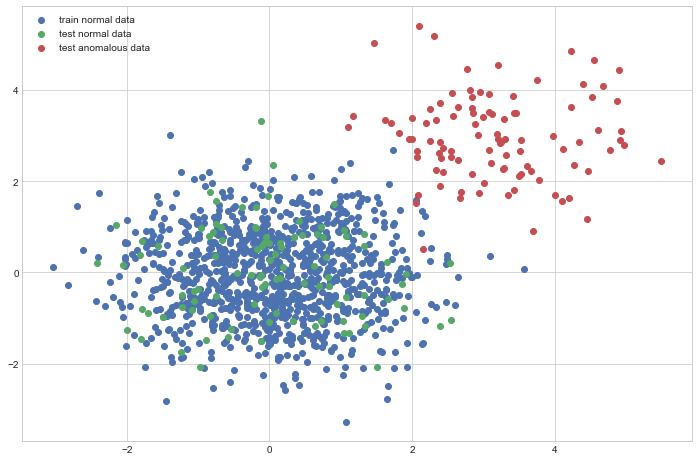

In [4]:
plt.figure(figsize=figsize)
plt.scatter(X_train_normal[:, 0], X_train_normal[:, 1], color="b", label="train normal data")
plt.scatter(X_test_normal[:, 0], X_test_normal[:, 1], color="g", label="test normal data")
plt.scatter(X_test_anomalous[:, 0], X_test_anomalous[:, 1], color="r", label="test anomalous data")
plt.legend()
plt.show()

In [5]:
contamination = 0.0
seed = 0
forest = IsolationForest(contamination=contamination, seed=seed)

In [6]:
forest.fit(X_train_normal)

In [7]:
Y_train_normal_pred = forest.predict(X_train_normal)
accuracy_score(Y_train_normal, Y_train_normal_pred)

0.987

In [8]:
Y_test_normal_pred = forest.predict(X_test_normal)
accuracy_score(Y_test_normal, Y_test_normal_pred)

0.98

In [9]:
Y_test_anomalous_pred = forest.predict(X_test_anomalous)
accuracy_score(Y_test_anomalous, Y_test_anomalous_pred)

0.97